<a href="https://colab.research.google.com/github/LeeJeaHyuk/2021-2022-study/blob/main/2022datascience/0425-Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
회귀분석이란 것에 잘 이해하지 못하고 있다는 생각이 들었다.  

이전에 분류 모델을 회귀로 풀이하려고 했더니 라쏘 모델에서 모든특성이 의미 없다는 결과가 나오고 나서야 지금 내가 하고 있는 것이 분류라는 것을 깨닫았다. 

회귀란  
관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법이다.  
[회귀 분석 위키](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D)

하지만 이전에 카테고리컬(범주형) 변수를 회귀로 풀어버려서 엉뚱한 결과를 맞이했다.

분석할 데이터에 대한 이해가 부족하면 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [4]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.74MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [5]:
!ls

Fish.csv  fish-market.zip  sample_data


In [6]:
df = pd.read_csv('Fish.csv')

In [49]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [71]:
y=df['Weight']
X=df.drop(['Species','Weight','Length2','Length3'] ,axis=1)

In [72]:
X

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340
...,...,...,...
154,11.5,2.0904,1.3936
155,11.7,2.4300,1.2690
156,12.1,2.2770,1.2558
157,13.2,2.8728,2.0672


# 데이터 선형성 파악

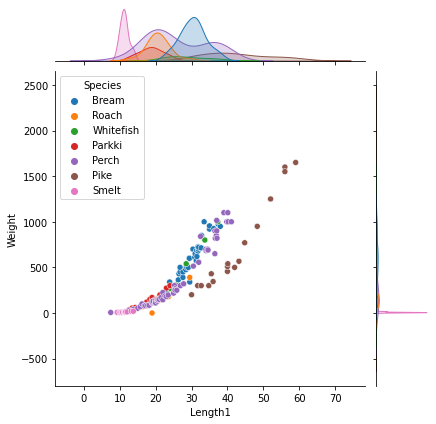

In [107]:
sns.jointplot(x='Length1', y='Weight',hue='Species', data=df )

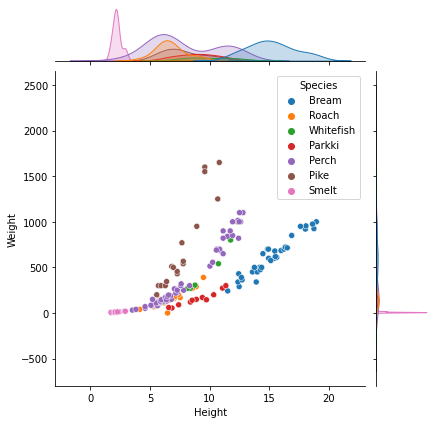

In [109]:
sns.jointplot(x='Height', y='Weight',hue='Species', data=df )

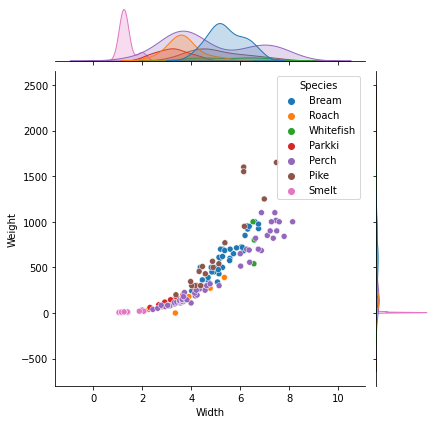

In [110]:
sns.jointplot(x='Width', y='Weight', hue='Species',data=df )

# 훈련 데이터 나누기

In [73]:
from sklearn.model_selection import train_test_split
train_input,  test_input, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state=42)

# 다중 회귀

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
poly_features.fit(train_input)

train_poly = poly_features.transform(train_input)
test_poly = poly_features.transform(test_input)

In [75]:
print(train_poly.shape)

(111, 55)


## 모델 훈련

In [96]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

y_predict=lr.predict(train_poly)

0.9954266264450492


In [97]:
print(lr.score(test_poly, test_target))

0.8754620655615072


# 규제

## 릿지

In [78]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# ss.fit(train_poly)

# train_scaled = ss.transform(train_poly)
# test_scaled = ss.transform(test_poly)

In [79]:
train_scaled = train_poly
test_scaled = test_poly

In [80]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9946985332449295


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.79748e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [81]:
print(ridge.score(test_scaled, test_target))

0.7977374446913699


In [82]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [83]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.71634e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.84148e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.80362e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.79748e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

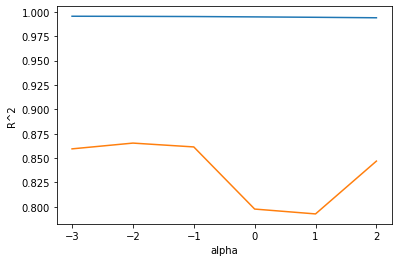

In [84]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [85]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9950657117574616
0.8614220032900208


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.80362e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# 라쏘

In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9882585568164219


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.717e+04, tolerance: 1.436e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [87]:
print(lasso.score(test_scaled, test_target))

0.9698796009744133


In [88]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.853e+04, tolerance: 1.436e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.862e+04, tolerance: 1.436e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

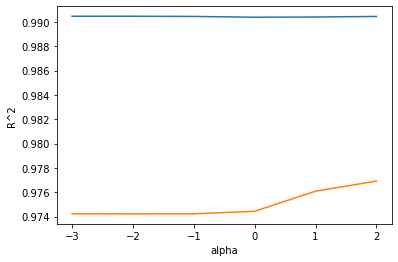

In [90]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [91]:
print(np.sum(lasso.coef_ == 0))

19
